<a href="https://colab.research.google.com/github/Essi-Narim/Titanic-Project-Machine-Learning-from-Disaster-/blob/main/EN_Taitanic_Final_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#     ***Titanic Project: Machine Learning from Disaster!***

The aim of this notebook is to provide a step-by-step walkthrough of how a data scientist tackles a problem. Specifically, we'll be looking at the challenge of predicting whether an individual survived the infamous Titanic shipwreck.

Here's a brief overview of the approach we'll take:

1.	**Shape Analysis**: understanding the data shape through methods like histograms and box plots.
2.	**EDA**: exploring the data to identify any patterns or insights that may be useful for modeling.
3.  **Data Cleaning**: cleaning the data to ensure it's consistent and free from errors or inconsistencies.
4.	**Feature Engineering & Data pre-Processing for ML**: creating new features that may help improve model accuracy.
5.	**Machine Learning** 
6.	**Deep Learning with TensorFlow & SKLEARN** 


# **1. Shape Analysis**

## 1.1 Importing Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#magic command to display matplotlib plots inline
%matplotlib inline 

In [ ]:
df_train = pd.read_csv("./Data/train.csv") 
df_test = pd.read_csv("./Data/test.csv")
df_train ["train_test"] = 1
df_test ["train_test"] = 0
## df_train['Survived'] = df_train['Survived'].replace({0: 'No', 1: 'Yes'}) # make target variable more descriptive
df_test ["Survived"] = np.NaN
df_all = pd.concat([df_train, df_test])


Lines 3-4 create a new column called "train_test" in both DataFrames, and set the value to 1 for "df_train" and 0 for "df_test". This column is created as a way to distinguish between the two sets of data after they are combined.

The line "df_test ["Survived"] = np.NaN" adds a new column named "Survived" to "df_test" with all values initialized to NaN (not a number). This is because the **"Survived"** column is the ***target variable*** we want to predict, and it is *missing* in the **test** dataset.

Finally, the last line of code uses the pandas "concat" function to combine both DataFrames vertically into a single DataFrame called "df_all". This merged DataFrame will be used for further data exploration, cleaning, and feature engineering.

## 1.2 Shape Analysis

In [ ]:
# columns of ALL dataset
df_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [ ]:
# Data types & null counts of Train
df_train.info()
# Central tendencies of numeric data of Train
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


We have missing values in Age (float), Cabin (obj), and Embarked (obj).

# **2. Explaratory Data Analysis**

EDA will be performed only on **Training** data frame (df_train)

## 2.1 Separation of Numerical & Categorical variables

In [ ]:
# make a list of all categorical varaibles in training df
cat_ls = list(df_train.select_dtypes("object").columns); print(cat_ls)
# make a df of only categorical varaibles in training df
df_cat = df_train[cat_ls]; df_cat.head()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [ ]:
# make a list of all numerical varaibles in training df
num_ls  = list(df_train.describe().columns); print(num_ls)
# make a df of only numerical varaibles in training df
df_num = df_train[num_ls]; df_num.head()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'train_test']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,0,3,35.0,0,0,8.0500,1


## 2.2 Exploring Numerical variables (including **target variable** "Survived")

### 2.2.1 **Distribution** of Numerical variables (histograms)

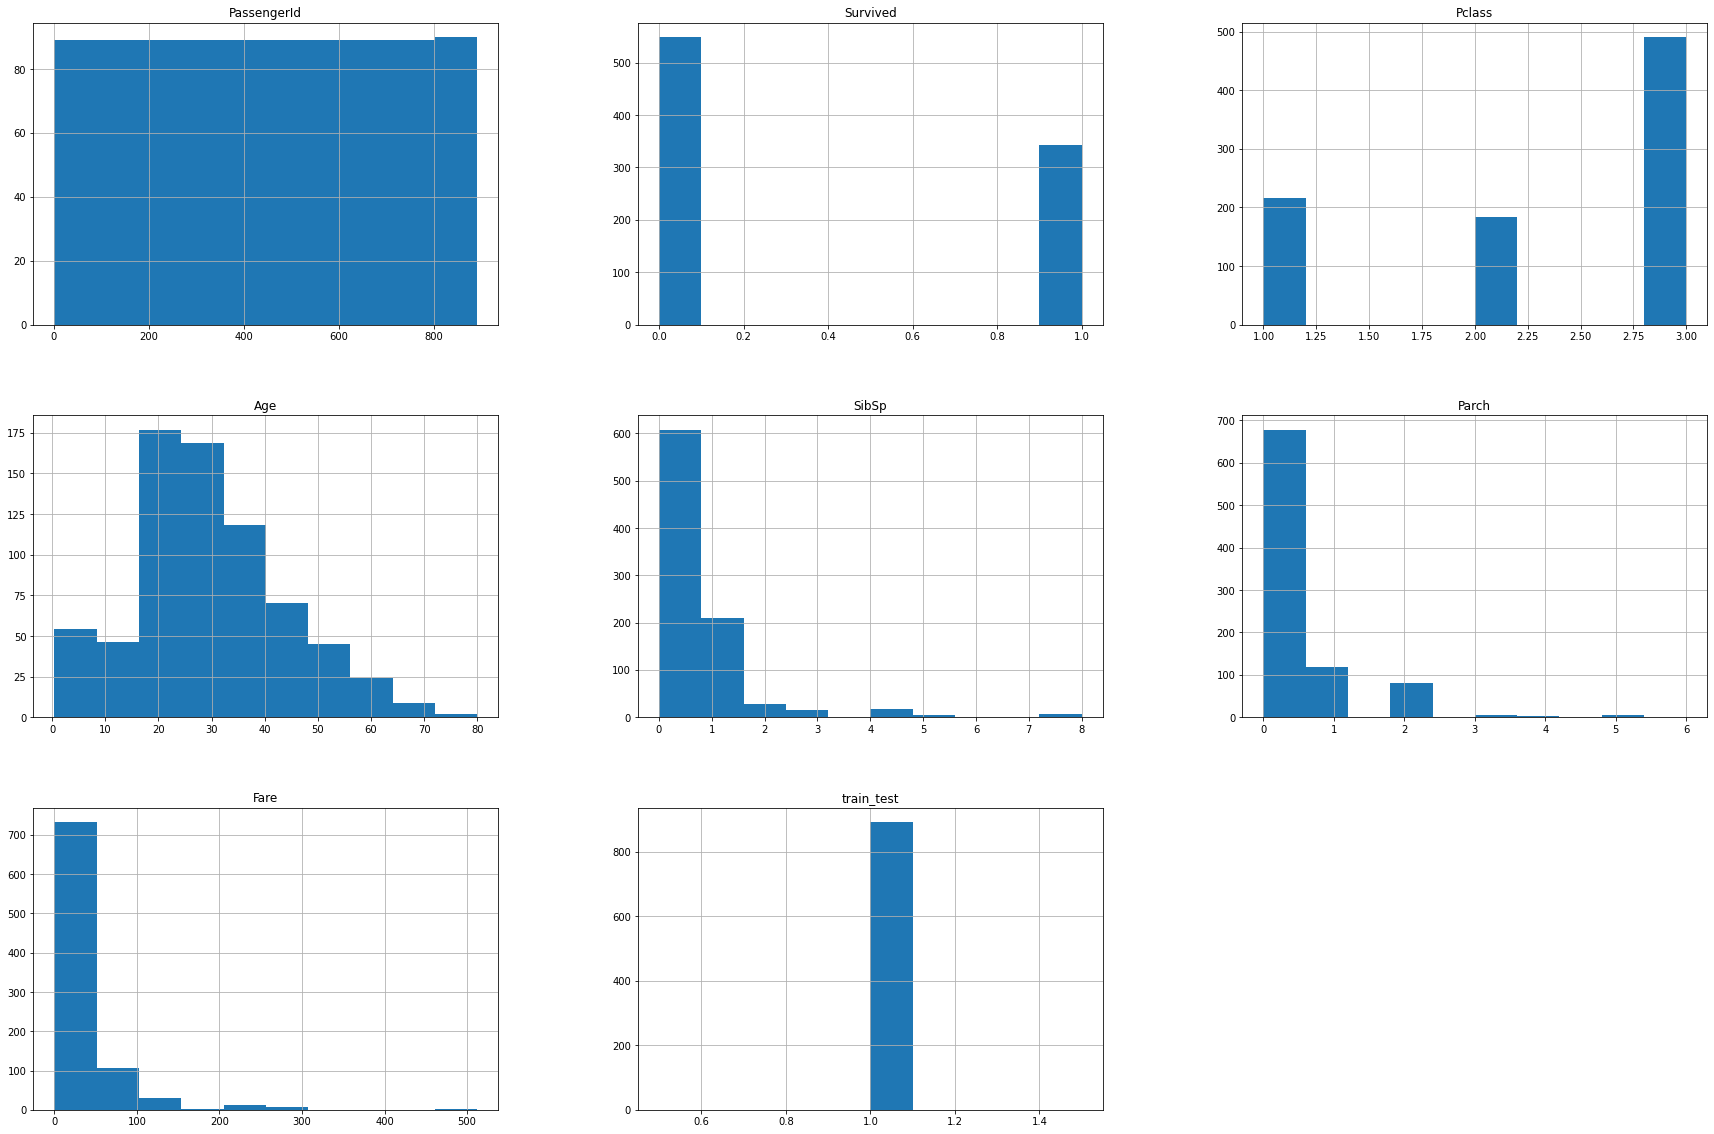

In [ ]:
df_num.hist(bins=10, figsize=(30,20))
plt.show()

1. We see that only 'Age' and 'Fare' are of relevance to our modeling mission. 

2. 'SibSp' and 'Parch' will be treated as Categorical variables!

2. Only 'Age' is almost *normally distributed*. For the rest (i.e., 'Fare'), ***normalization*** is required!



*   If a variable (x) is not normally distributed, we can apply a **transformation** to *make it more normal before normalization*. One common transformation is the **logarithmic transformation**. See Sec. 4.3 for more about transformation.

### 2.2.2 **Correlation** between Numerical variables

<Axes: >

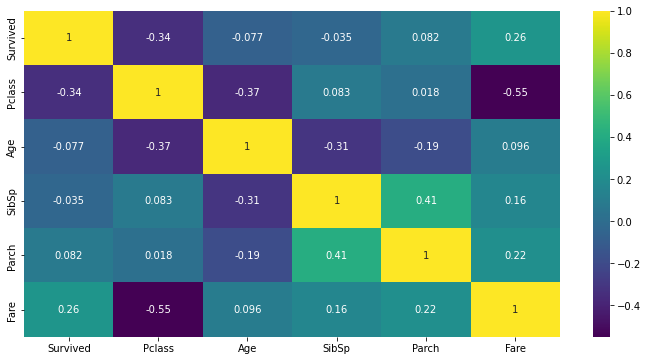

In [ ]:
# drop 'PassengerId', 'train_test'
df_num = df_num.drop(['PassengerId', 'train_test'], axis=1)
# Heatmap of Correlation Matrix
plt.figure(figsize = (12,6)) # define the figure size
sns.heatmap(df_num.corr(), annot=True, cmap="viridis")

1. Considerable **positive** correlation between:

Parch (# of parents / children aboard the Titanic) and SibSp (# of siblings / spouses aboard the Titanic) 0.41;  Parch & Fare 0.22 etc.

2. Considerable **negative** correlation between:

Pclass & Fare -0.55; Age & Pclass -0.37; Age & SibSp -0.31 etc.

We further investigate the relationship between Parch and SibSp, and Pclass and Fare via scatterplots.

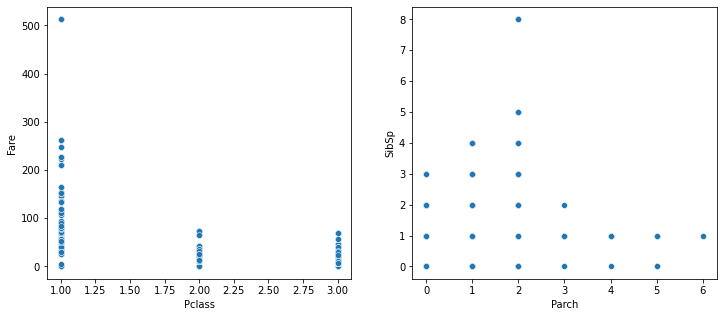

In [ ]:
fig, axes = plt.subplots (1, 2, figsize=(12, 5))

sns.scatterplot(x="Pclass", y="Fare", data=df_num, ax=axes[0])
axes[0].set_xlabel("Pclass")
axes[0].set_ylabel("Fare")

sns.scatterplot(x="Parch", y="SibSp",data=df_num, ax=axes[1])
axes[1].set_xlabel("Parch")
axes[1].set_ylabel("SibSp")

plt.show()

Nithing interesting was observed except that Fare is higher for Pclass 1!

## 2.3 Relationship between target varaible ("Survived", categorical) and numerical variable

In [ ]:
num_ls_updated  = list(df_num.describe().columns); print (num_ls_updated) # updated list of numerical variables

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


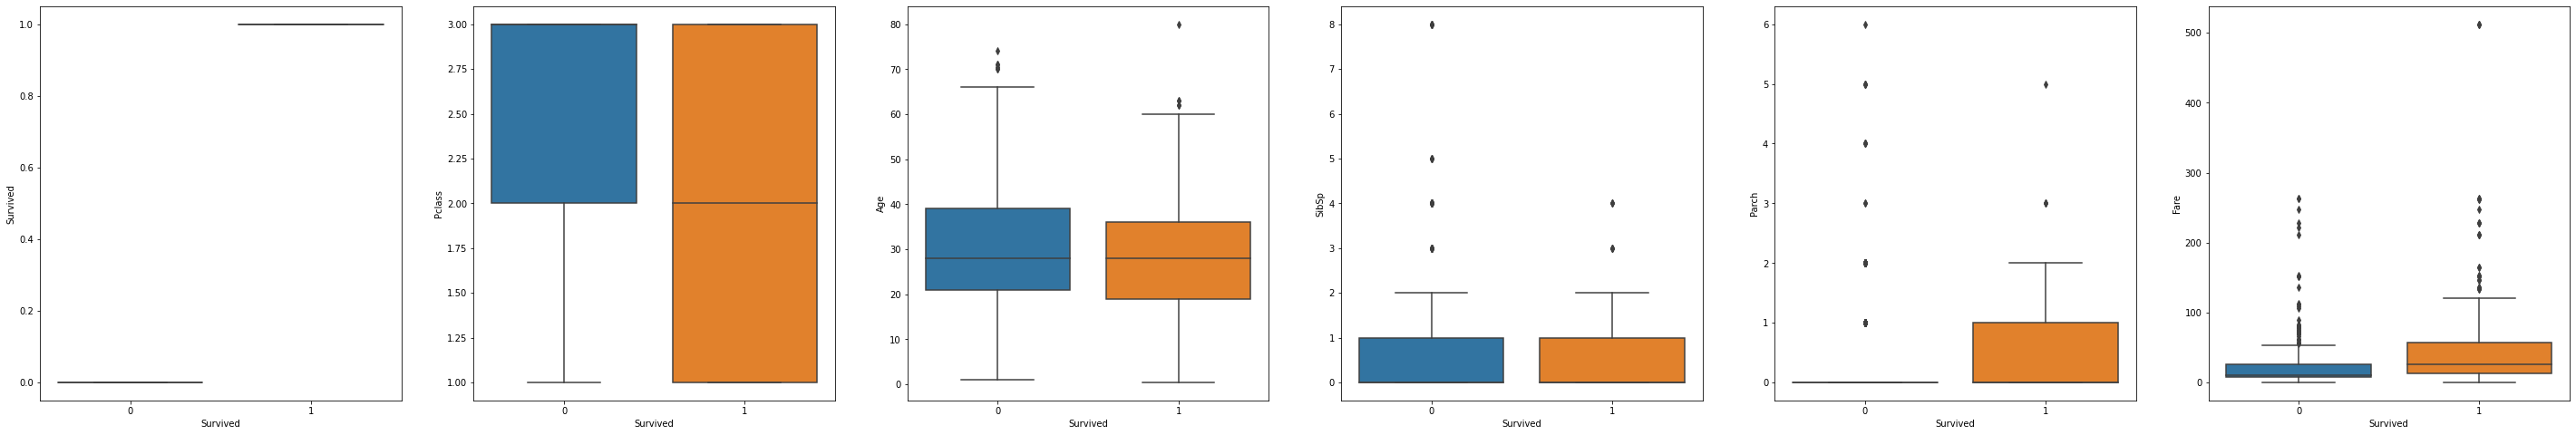

In [ ]:
fig, axes = plt.subplots(1, len(num_ls_updated), figsize=(50, 8))

for i in num_ls_updated:
  sns.boxplot(x='Survived', y=i, data=df_train, ax=axes[num_ls_updated.index(i)])
  axes[num_ls_updated.index(i)].set_xlabel('Survived') 
  axes[num_ls_updated.index(i)].set_ylabel(i)


**Assumption**: If the medians of a numerical variabales as a fucntion of "Survived"  are close, that varaibles is not a good factor for investigating the trget variable!!

Conclusion: Pclass, Parch and Fare are important factors in predicting the target variable! Thus, we inestigate the statistics of them:

In [ ]:
df_train.groupby("Survived")["Pclass"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


In [ ]:
df_train.groupby("Survived")["Parch"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,0.329690,0.823166,0.0,0.0,0.0,0.0,6.0
1,342.0,0.464912,0.771712,0.0,0.0,0.0,1.0,5.0


* Parch is not a good factor for predicting the target variable!

In [ ]:
df_train.groupby("Survived")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


## 2.4 Relationship between target varaible ("Survived", categorical) and categorical variable

In [ ]:
# we add "Pclass" to the cat_ls to investigate it also as a categorical variable
cat_ls.append("Pclass")
print(cat_ls)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']


It indicates that there is a significant difference in the survival rates between males and females on the Titanic, with a much higher proportion of females (>70%) surviving compared to males (<20%)!

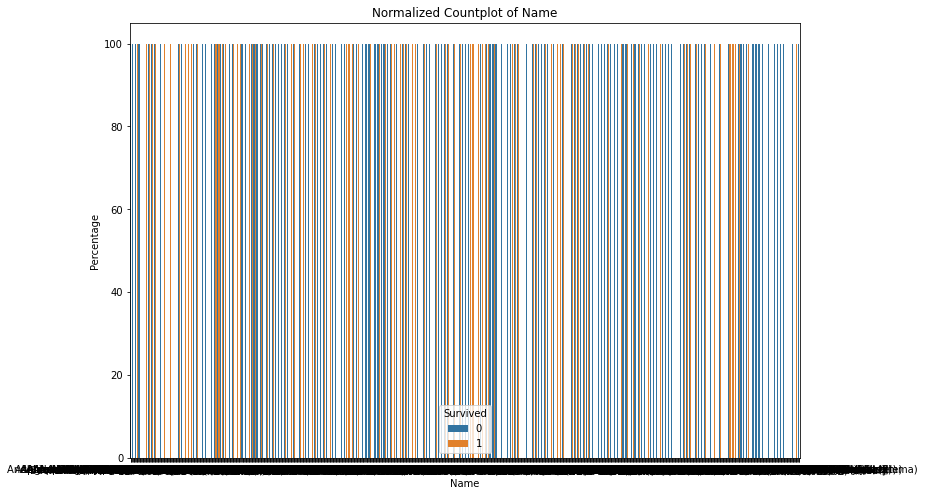

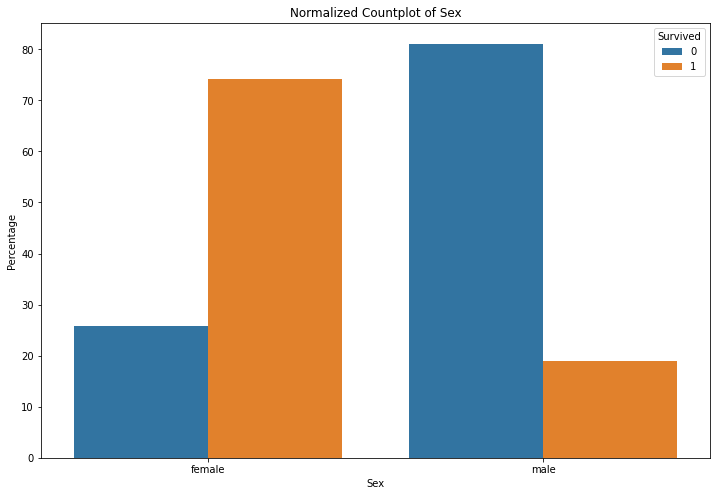

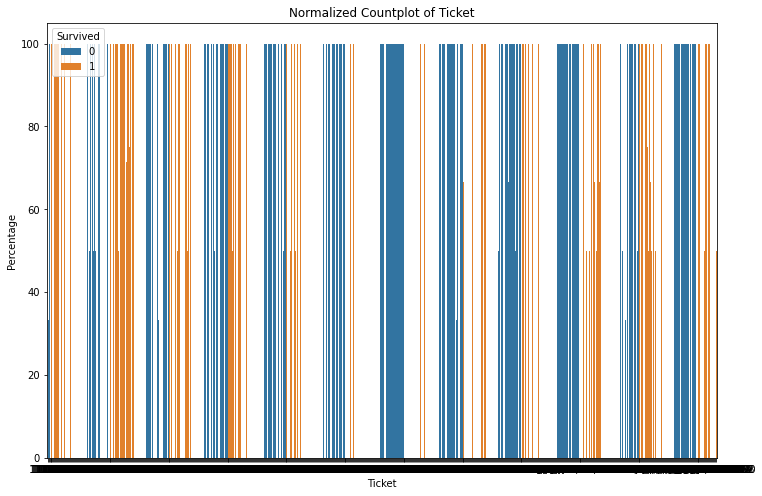

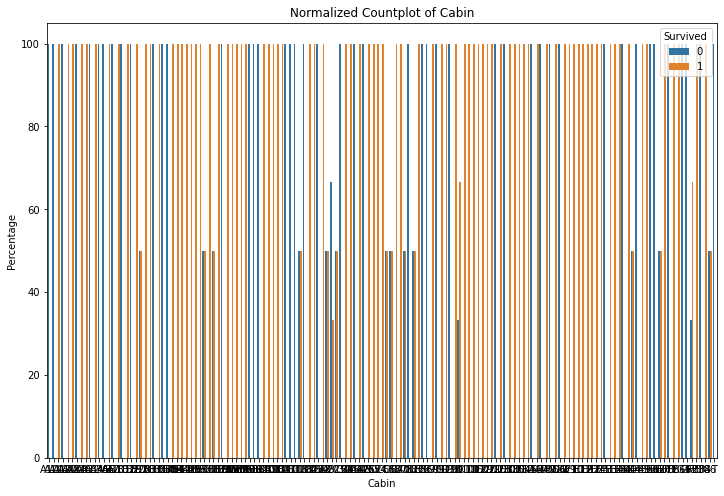

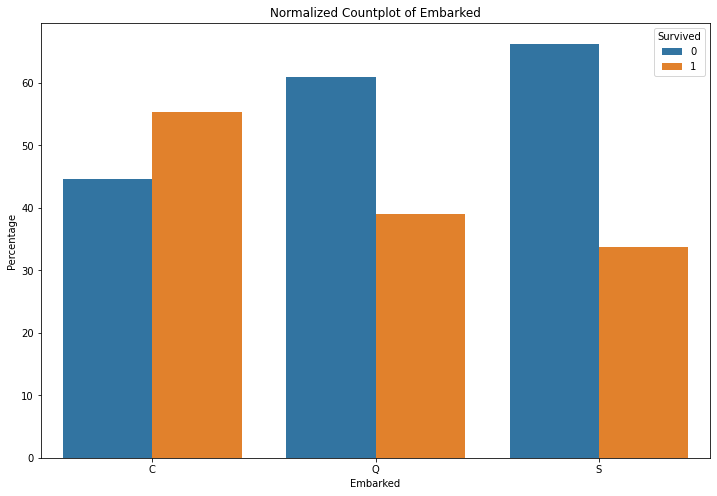

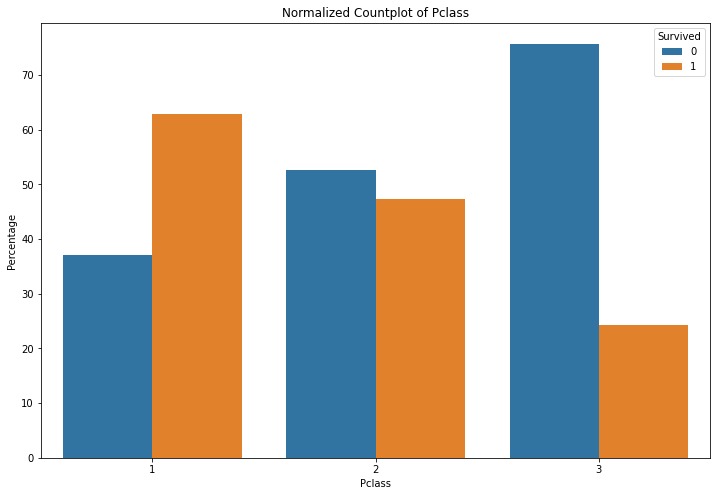

In [ ]:
for col in cat_ls:
    if col != 'Survived':
        # Calculate the percentage of Survived within each category in the column
        perc_df = df_train.groupby([col, "Survived"]).size().reset_index(name="count")
        perc_df["percentage"] = perc_df.groupby(col)["count"].apply(lambda x: (x / x.sum()) * 100)

        # Plot the percentage using a bar plot
        plt.figure(figsize=(12,8))
        sns.barplot(x=col, y="percentage", hue="Survived", data=perc_df)
        plt.xlabel(col)
        plt.ylabel("Percentage")
        plt.title(f"Normalized Countplot of {col}")
        plt.show()


The analysis of categorical variables in the Titanic dataset reveals some interesting patterns:
1.	Survival rates between males and females differ significantly, with a much higher proportion of females (over 70%) surviving compared to males (less than 20%).
2. There is a strong relationship between Pclass and survival rate. More than 60% of passengers in class 1 survived, while just above 50% of those in class 2 survived. On the other hand, more than 70% of passengers in class 3 died, indicating that the class of the passenger played a significant role in their likelihood of survival.
3.	Port of Embarkation is another variable that is associated with survival, with passengers embarking at Cherbourg having the highest survival rate compared to the other two ports. On the other hand, passengers who embarked from Southampton had the lowest survival rate.
4.	Name, Cabin, and Ticket are categorical variables that do not provide much useful information in their current form. However, after feature engineering, they may become more useful in predicting survival.

To quantify these observations (1-3):

In [ ]:
# update categorical list by keeping varaibles only in steps 1-3
cat_ls=['Survived', 'Sex', 'Embarked', 'Pclass']

# Create an empty dictionary to store the results
results_dict = {}

# Loop through each categorical variable
for col in cat_ls:
    if col != 'Survived':
        # Calculate the percentage of Survived within each category in the column
        perc_df = df_train.groupby([col, "Survived"]).size().reset_index(name="count")
        perc_df["percentage"] = perc_df.groupby(col)["count"].apply(lambda x: (x / x.sum()) * 100)

        # Store the results in the dictionary
        results_dict[col] = perc_df.pivot(index='Survived', columns=col, values='percentage')

# Create a DataFrame from the dictionary
results_df = pd.concat(results_dict, axis=1)

# Print the DataFrame
print(results_df)

                Sex              Embarked                           Pclass  \
             female       male          C          Q          S          1   
Survived                                                                     
0         25.796178  81.109185  44.642857  61.038961  66.304348  37.037037   
1         74.203822  18.890815  55.357143  38.961039  33.695652  62.962963   

                                
                  2          3  
Survived                        
0         52.717391  75.763747  
1         47.282609  24.236253  


# **3. Data Cleaning**

## 3.1 Missing Values
1. Check for missing values of DataFrame
2. Drop columns with more than 90% missing values
3. Investigate columns containing missing values one-by-one

In [ ]:
# percentage of missing values in each column (Train)
df_train.isnull().sum()*(100/len(df_train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
train_test      0.000000
dtype: float64

In [ ]:
# percentage of missing values in each column (All)
df_all.isnull().sum()*(100/len(df_all))

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
train_test      0.000000
dtype: float64

### 3.1.2 Age
As we saw in sec 2.2.1, Age is almost normally distributed. Thus, it is generally safe to use either the mean or the median to fill in missing values. However, if the data has a few outliers or extreme values, then the median may be a better choice, as it is less sensitive to extreme values. On the other hand, if the data is relatively symmetric and does not have many outliers, the mean may be a more appropriate choice.

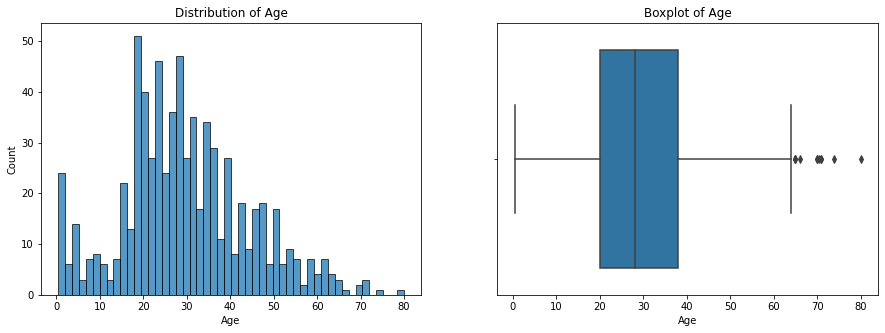

In [ ]:
# check the distribution of Age

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram on the first subplot
sns.histplot(df_train["Age"], bins=50, ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Age")

# Plot boxplot on the second subplot
sns.boxplot(x=df_train["Age"], ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_title("Boxplot of Age")

plt.show()

So, we based on this observation we use median to fill in missing values in Age

In [ ]:
# Impute Nulll in 'Age' column of All with median of Age column of Train
## df_train["Age"].fillna(df_train["Age"].median(), inplace=True)
df_all["Age"].fillna(df_train["Age"].median(), inplace=True)

### 3.1.3 Cabin
The cabin column must be discarded since:
1. There is an ovewhelming number of missing values (more than 77%)
2. It contains a large number of unique values (sec 2.4 Figure 4)

In [ ]:
## df_train.drop("Cabin", axis=1, inplace=True)
df_all.drop("Cabin", axis=1, inplace=True)

### 3.1.4 Embarked

The Embarked column has only 2 missing values out of 1309 rows, so it is not a big problem. Some possible ways to deal with it are:

1. Drop the rows with missing values, since they are very few and will not affect the overall analysis much2.
2. Impute nulls values with the most frequent value, which is ‘S’ for Southampton3.

We take the second approach here:

In [ ]:
# Find the most frequent value in "Embarked" of Train
most_freq_emb = df_train["Embarked"].mode()[0]    # [0] is used to select the first/only value in the resulting Series
# Impute nulls with the most frequent value in All
df_all["Embarked"].fillna(most_freq_emb, inplace=True)

### 3.1.5 Fare

As seen in sec. 2.3, Fare has many outliers, hence, its median is used for imputing the missing values.

In [ ]:
# Impute Nulll in 'Fare' column of All with median of 'Fare' column of Train
df_all["Fare"].fillna(df_train["Fare"].median(), inplace=True)

## 3.2 Sanity Check
Now, we should perform a sanity check on the data frame to confirm whether all missing values have been appropriately handled.

In [ ]:
# Calculate the percentage of missing values in each column
df_all.isnull().sum()*(100/len(df_all))

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
train_test      0.000000
dtype: float64

# **4. Feature Engineering & Data pre-Processing for ML**



Feature Engineering is the process of creating new features or modifying existing features to improve the performance of the model. Data preprocessing is the process of preparing data for analysis or machine learning by cleaning, transforming, and normalizing the data. This involves dealing with outliers, selecting relevant features, converting categorical variables into numerical ones, and scaling or normalizing the data. The goal of data preprocessing is to ensure that the data is in a suitable form for modeling and to increase the accuracy and effectiveness of the analysis or machine learning algorithms.

In the case of the Titanic dataset, we can perform the following feature engineering steps:
1.	**Ticket** - The Ticket variable contains information about the ticket number of each passenger. We can extract the *ticket prefix, which may be an indication of ticket type* and could impact survival rates.
2. **Name** - The Name variable contains information about the title of each passenger. We can extract the *title* from each name (e.g., Mr, Mrs, Miss, etc.) and create a new variable called Title. This may be an indication of *social status* and could impact survival rates.
3. Data **Transformation** towards the *normal distribution*
4. **Encoding** (one-hot-encoding)
5. **Standard Scaling**
6. **Train-Test Split**

## 4.1 Ticket

In [ ]:
# print the first 30 unique values of the Ticket column
df_train["Ticket"].unique()[:30]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601'],
      dtype=object)

Ticket numbers are combinations of unknown length digits at the end of Ticket variables separated from the rest of content by a space.

In [ ]:
# extract ticket numbers from Ticket column
TicketNumber = df_train['Ticket'].apply(lambda x: x.split()[-1]) # split the string x using whitespace as the
                                                                 # delimiter and then return the last element of the resulting list. 
df_train['TicketNumber'] = TicketNumber

In [ ]:
df_train['TicketNumber'].describe()

count      891
unique     679
top       2343
freq         7
Name: TicketNumber, dtype: object

top: the most common value in the column, which is '2343'. This ticket number appears 7 times in the dataset, which is the highest frequency among all ticket numbers. freq: the frequency of the most common value in the column, which is 7.

Since the extracted ticket numbers don't have any numerical meaning or order, and they are just identifiers, then it's better to treat them as categorical variables.

This new column (TicketNumber) has "**curse of dimensionality**" problem meaning during encoding (one-hot encoding etc.) it will result into 679 new columns or numerical values. Hence, this variable is useless and we dont need to consider it further.

In [ ]:
# drop the "Ticket" column from the "df_train" DataFrame
df_all.drop("Ticket", axis=1, inplace=True)

## 4.2 Name

In [ ]:
# print the first 20 unique values of the Name column
df_train['Name'].unique()[:20]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima'], dtype=object)

In [ ]:
# extract Titles from Name column and save them in Title column in All
df_all['Title'] =df_all.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

The lambda function splits the 'Name' string using the comma ',' as a delimiter, and selects the second part (i.e., index 1) which contains the title and the first name. It then splits this string using the dot '.' as a delimiter, and selects the first part (i.e., index 0) which contains the title only. Finally, it removes any leading or trailing spaces from the title using the strip() method.

In [ ]:
# drop the "Name" column from the "df_all" DataFrame
df_all.drop("Name", axis=1, inplace=True)

In [ ]:
df_all["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
# Group the data by title and calculate the percentage of passengers who survived for each title
# The resulting values are sorted in descending order
## df_train.groupby("Title").Survived.apply(lambda x: (x == "Yes").sum() / x.count() * 100).sort_values(ascending=False)
df_all.groupby("Title").Survived.apply(lambda x: (x == 1).sum() / x.count() * 100).sort_values(ascending=False)

<ipython-input-34-aa79f036e812>:4: RuntimeWarning: invalid value encountered in long_scalars
  df_all.groupby("Title").Survived.apply(lambda x: (x == 1).sum() / x.count() * 100).sort_values(ascending=False)


Title
the Countess    100.000000
Mlle            100.000000
Sir             100.000000
Ms              100.000000
Lady            100.000000
Mme             100.000000
Mrs              79.200000
Miss             69.780220
Master           57.500000
Col              50.000000
Major            50.000000
Dr               42.857143
Mr               15.667311
Jonkheer          0.000000
Rev               0.000000
Don               0.000000
Capt              0.000000
Dona                   NaN
Name: Survived, dtype: float64

 It is evident that females titles, such as The Countess, Mlle, Sir, Ms, Lady, and Mme, all have a 100% survival rate. Among the male titles, only those of Col, Major, and Dr have a 50% or more survival rate. The title Mr, which is the most common among male passengers, has the lowest survival rate of only 15.67%. Finally, it is noteworthy that Jonkheer, Rev, Don, and Capt have a 0% survival rate.

## 4.3 Data Transformation

Data transformation towards a normal distribution is often performed before machine learning modeling because many algorithms assume that input features follow a normal or Gaussian distribution. There are some important methods to transform a non-normally distributed variable into a normally distributed one, including:
1.	Log transformation
2.	Box-Cox transformation
3.	Quantile transformation

The skewness and kurtosis measures of the original distribution indicate that it is highly skewed and has a heavy tail. A normal distribution has a **kurtosis of 3**. The normal distribution has a **skewness of 0**.

### 4.3.1 **Transformation** of Fare

Original Fare Distribution: Skewness=4.787316519674893, Kurtosis=33.39814088089868
Log Transformed Fare Distribution: Skewness=0.3949280095189306, Kurtosis=0.976142106683104
Box-Cox Transformed Fare Distribution: Skewness=-0.0403291827587629, Kurtosis=1.5322771036478229
Quantile Transformed Fare Distribution: Skewness=0.0007562734885324992, Kurtosis=-1.203150088114603


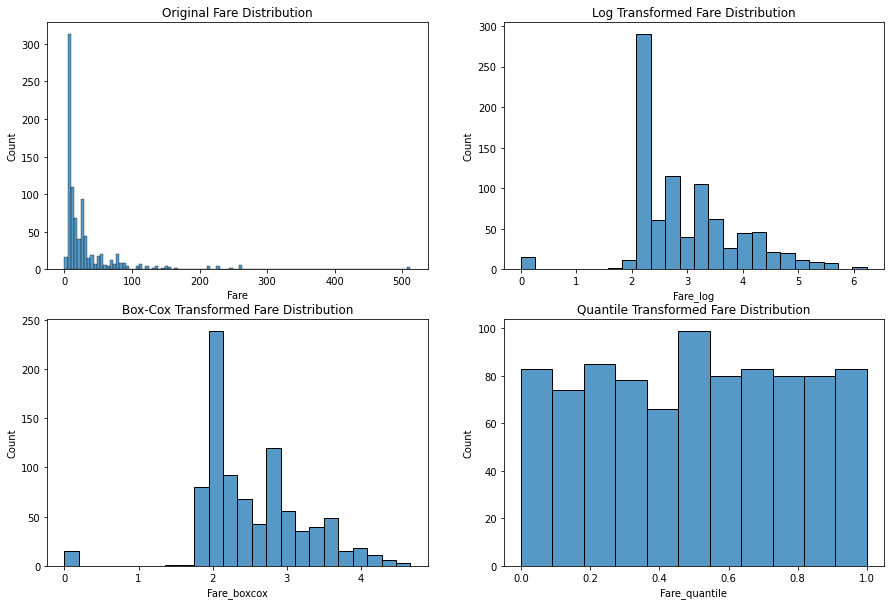

In [ ]:
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer

# log transformation
df_train['Fare_log'] = np.log(df_train['Fare']+1)

# box-cox transformation
df_train['Fare_boxcox'], _ = boxcox(df_train['Fare']+1)

# quantile transformation
transformer = QuantileTransformer(n_quantiles=100, random_state=0)
df_train['Fare_quantile'] = transformer.fit_transform(df_train['Fare'].values.reshape(-1, 1))

# plot the distributions of the original data and transformed data
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df_train['Fare'], ax=axs[0, 0])
axs[0, 0].set_title('Original Fare Distribution')
sns.histplot(df_train['Fare_log'], ax=axs[0, 1])
axs[0, 1].set_title('Log Transformed Fare Distribution')
sns.histplot(df_train['Fare_boxcox'], ax=axs[1, 0])
axs[1, 0].set_title('Box-Cox Transformed Fare Distribution')
sns.histplot(df_train['Fare_quantile'], ax=axs[1, 1])
axs[1, 1].set_title('Quantile Transformed Fare Distribution')

# print the skewness and kurtosis of each transformation
print('Original Fare Distribution: Skewness={}, Kurtosis={}'.format(df_train['Fare'].skew(), df_train['Fare'].kurt()))
print('Log Transformed Fare Distribution: Skewness={}, Kurtosis={}'.format(df_train['Fare_log'].skew(), df_train['Fare_log'].kurt()))
print('Box-Cox Transformed Fare Distribution: Skewness={}, Kurtosis={}'.format(df_train['Fare_boxcox'].skew(), df_train['Fare_boxcox'].kurt()))
print('Quantile Transformed Fare Distribution: Skewness={}, Kurtosis={}'.format(df_train['Fare_quantile'].skew(), df_train['Fare_quantile'].kurt()))


Based on our output, the Box-Cox transformed distribution seems to be the best choice among the three, since its skewness is the closest to 0 (-0.04) and its kurtosis is closer to 3 (1.53) compared to the other two transformations.

Therfore, we use the **Box-Cox** trnasformation on combined dataset:

In [ ]:
# box-cox transformation
df_all['Fare_boxcox'], _ = boxcox(df_all['Fare']+1) # +1 handles any potential zero values in the 'Fare' column

In [ ]:
df_all['Fare_boxcox']

0      1.824485
1      3.211250
2      1.882515
3      3.049783
4      1.892711
         ...   
413    1.892711
414    3.433330
415    1.824485
416    1.892711
417    2.542584
Name: Fare_boxcox, Length: 1309, dtype: float64

## **4.4 Encoding**

**Categorical** variables in our pre-processes and engineered data frame (df_all):

**'Pclass', 'Sex', ‘SibSp’, 'Parch', 'Embarked', 'train_test', 'Title'**

And continues (and normally distributed) **numerical** variables are:

**'Age', and 'Fare_boxcox'**

We perform encoding (one-hot-encoding here) using pd.get_dummies() or another encoding method, which creates a new DataFrame all_dummies. This new DataFrame will contain the **encoded non-numeric categorical** variables, **numeric categorical variables**, and **continuous numerical** variables.

*  **'Pclass'** feature is an ordinal categorical variable representing the ticket class. The safest option for handling the 'Pclass' feature in the Titanic dataset would be to one-hot encode it, as this approach can work well with most machine learning algorithms. So, we first convert it to a string before hot-hot-encoding.
* 'Parch' is a discrete numerical variable with values ranging from 0 to a small positive integer. The safe option for the 'Parch' feature in the Titanic dataset would be to use the variable as-is without scaling or encoding it, especially if you are using tree-based algorithms like decision trees and random forests.

In [ ]:
# Convert the Pclass feature to a string data type to treat it as a categorical variable
df_all.Pclass = df_all.Pclass.astype(str)

all_dummies = pd.get_dummies(df_all[['Age','Fare_boxcox', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'train_test', 'Title']])

In [ ]:
all_dummies.columns

Index(['Age', 'Fare_boxcox', 'SibSp', 'Parch', 'train_test', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Don',
       'Title_Dona', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

## 4.5 **Standard Scaling**
Standard scaling is a preprocessing step in machine learning that aims to standardize the features in the training and test data so that they have a **mean of 0** and a **standard deviation of 1**. It is important because some machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) or gradient descent (e.g., logistic regression, neural networks), are sensitive to the scale of the input features. By **standardizing** the data, these algorithms can perform better and converge faster during training.
* if you first transform your continuous variable into a normal distribution and then apply standard scaling, your variable will be transformed into a **standard normal distribution**. 
* standard scaling is usually applied to continuous variables and **not to** label **encoded** or one-hot encoded categorical variables

In our case, we apply Standard Scaling to:

'Age', 'Fare_boxcox', 'SibSp', 'Parch'

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# List of features to scale
features_to_scale = ['Age', 'Fare_boxcox', 'SibSp', 'Parch']

# Create a copy of the all_dummies DataFrame to apply scaling without modifying the original
all_dummies_scaled = all_dummies.copy()

# Fit the scaler to the data and transform the selected features
all_dummies_scaled[features_to_scale] = scaler.fit_transform(all_dummies_scaled[features_to_scale])

## 4.6 Train-Test Split

We split encoded data into train and test sets for both scaled and unsclaed groups

In [ ]:
# Split preprocessed unscaled data ('all_dummies) into train (1) and test (0) sets, and remove 'train_test' column
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1) # Matrix
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1) # Matric

# Split preprocessed scaled data ('all_dummies_scaled) into train (1) and test (0) sets, and remove 'train_test' column
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1) # Matrix
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1) # Matric

#  Target variable for training: Get 'Survived' column for training set from 'df_all'
y_train = df_all[df_all.train_test==1].Survived # Vector

# **5.** **Machine Learning**

1. **Model Building (Baseline Validation Performance)**
2. **Model Tuning ( hyperparameter tuning)**
3. **Ensemble Learning**
4. **Predictions** 

## **5.1 Model Building (Baseline Validation Performance)**
Let's start by evaluating the performance of various models with default parameters using **5-fold cross-validation** to establish a baseline. This helps us determine how much improvement is possible with model tuning. It's important to note that a high baseline on the validation set does not necessarily mean that the model will perform well on the actual test set. The models we tested and their respective baseline accuracies are: 
1. Naive Bayes (72.6%)
2. Logistic Regression (82.1%)
3. Decision Tree (77.6%)
4. K Nearest Neighbor (80.5%)
5. Random Forest (80.6%)
6. Support Vector Classifier (83.2%)
7. Xtreme Gradient Boosting (81.8%)
8. Soft Voting Classifier - All Models (82.8%).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

### 5.1.1 Naive Bayes (**only scaled**)
Naive Bayes is usually used as a **baseline** for classification tasks. 

In [ ]:
# Naive Bayes is often used as a baseline for classification tasks
gnb = GaussianNB()

# Perform 5-fold cross-validation on the scaled training data
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv)

# Calculate and print the mean cross-validation score
print("Mean cross-validation score:", cv.mean())

Cross-validation scores: [0.61452514 0.63483146 0.79775281 0.78089888 0.61797753]
Mean cross-validation score: 0.6891971627644216


**Cross-validation** is a method for evaluating the performance of a machine learning model. The dataset is split into several subsets or "folds," and the model is trained and evaluated multiple times, with each fold being used as the test set once and the remaining folds as the training set. This allows for a more accurate estimate of how the model will perform on new, unseen data.

The output shows the cross-validation scores for a model, with the five scores listed in an array. The mean of these scores is then calculated to give a single overall score. In this case, the mean cross-validation score is 0.689, which indicates that the model is performing moderately well. 

### 5.1.2 Logistic Regression (Scaled vs Unscaled)

**Unscaled**

In [ ]:
# Create an instance of the logistic regression model with max iteration of 2000
lr = LogisticRegression(max_iter=2000)

# Perform 5-fold cross-validation on the unscaled training data
cv = cross_val_score(lr, X_train, y_train, cv=5)

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv)

# Calculate and print the mean cross-validation score
print("Mean cross-validation score:", cv.mean())

Cross-validation scores: [0.82122905 0.80898876 0.80337079 0.79775281 0.87078652]
Mean cross-validation score: 0.8204255853367648


**Sclaed**

In [ ]:
# Create an instance of the logistic regression model with max iteration of 2000
lr = LogisticRegression(max_iter=2000)

# Perform 5-fold cross-validation on the scaled training data
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv)

# Calculate and print the mean cross-validation score
print("Mean cross-validation score:", cv.mean())

Cross-validation scores: [0.82122905 0.80898876 0.80337079 0.80337079 0.87078652]
Mean cross-validation score: 0.8215491808423827


### 5.1.3 Decision Tree (Scaled vs Unscaled)

**Unscaled**

In [ ]:
# Create a DecisionTreeClassifier object
dt = tree.DecisionTreeClassifier(random_state = 1)

# Using 5-fold cross-validation on training data to evaluate model performance
cv = cross_val_score(dt,X_train,y_train,cv=5)

# Print cross-validation score for each fold and the mean score
print(cv)
print(cv.mean())

[0.76536313 0.78651685 0.83146067 0.71348315 0.80337079]
0.7800389178331555


**Scaled**

In [ ]:
# Create a DecisionTreeClassifier object
dt = tree.DecisionTreeClassifier(random_state = 1)

# Using 5-fold cross-validation on training data to evaluate model performance
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)

# Print cross-validation score for each fold and the mean score
print(cv)
print(cv.mean())

[0.76536313 0.78089888 0.8258427  0.71348315 0.79775281]
0.7766681313163015


### 5.1.4 K Nearest Neighbor (Scaled vs Unscaled)

**Unscaled**

In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77094972 0.79775281 0.80337079 0.81460674 0.84831461]
0.8069989328981231


**Scaled**

In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.78089888 0.84269663 0.80337079 0.84831461]
0.8181846713953927


### 5.1.5 Random Forest (scaled vs unscaled)

**Unscaled**

In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79329609 0.79213483 0.85393258 0.75280899 0.80337079]
0.7991086560793421


**Scaled**

In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79329609 0.78089888 0.85393258 0.75280899 0.80898876]
0.7979850605737241


### 5.1.6 Support Vector Classifier (**only scaled**)

In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8547486  0.82022472 0.82022472 0.80337079 0.86516854]
0.8327474734793798


### 5.1.7 Xtreme Gradient Boosting (**only sclaed**)

In [ ]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.80337079 0.86516854 0.78089888 0.8258427 ]
0.8181846713953925


### **5.1.8 Soft Voting Classifier**  (**only sclaed**)

The Voting Classifier is a machine learning ensemble method that combines the predictions of multiple individual models in order to obtain a single prediction.

Soft Voting Classifier is an *ensemble learning technique* used in machine learning where multiple models are combined to make a prediction. In Soft Voting, each model gives a **probability score** for each class, and then the scores from each model are **averaged** to give the final prediction. This is different from **Hard Voting**, where the models make a binary decision and the majority decision is taken as the final prediction.

In Soft Voting, the *weights of each model* can be adjusted to give more importance to certain models over others. This can be useful in cases where certain models are known to perform better on certain types of data or when there is a trade-off between accuracy and speed. The hard voting classifier counts the number of votes for each predicted class and selects the class with the most votes as the final prediction. In contrast, the soft voting classifier considers the predicted probabilities for each class from all individual models and selects the class with the highest average probability. If the average probability is greater than 50%, it will be counted as the positive class.

In [ ]:
# Create a soft voting classifier by providing a list of estimators to the VotingClassifier constructor
voting_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('rf', rf), ('gnb', gnb), ('svc', svc), ('xgb', xgb)], voting='soft') 

# Evaluate the voting classifier using 5-fold cross validation
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores
print(cv)

# Print the mean cross-validation score
print(cv.mean())

[0.8547486  0.83146067 0.8258427  0.79775281 0.85393258]
0.8327474734793798


cross-validation scores range from 0.797 to 0.855, indicating that the model's performance can vary somewhat depending on the specific split of the data into training and validation sets. However, the mean cross-validation score of 0.833 suggests that the model is performing relatively well overall.

Finally, we **train** the **soft classifier model** (as it has the highest cross-validation mean scores) on the entire training set (X_train_scaled, y_train), and the trained model is used to predict the survival outcome for the passengers in the **test** set (X_test_scaled). The predicted outcome is stored in a pandas DataFrame with the passenger IDs and the predicted survival outcome, and it is saved as a CSV file named 'base_submission.csv'.





In [ ]:
# Fit the voting classifier on the training data
voting_clf.fit(X_train_scaled,y_train)

# Predict the survival outcomes for the test data using the trained voting classifier
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)

# Create a dictionary containing the predicted survival outcomes along with the passenger IDs
basic_submission = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_base_vc}

# Convert the dictionary into a DataFrame
base_submission = pd.DataFrame(data=basic_submission)

# Save the DataFrame as a CSV file without the index column
base_submission.to_csv('base_submission.csv', index=False)

## **5.2 Model Tuning (hyperparameter tuning)**

Model performance tuning refers to the investigating the performance of a machine learning model through a process called hyperparameter tuning. **Hyperparameter tuning** is an optimization process where the goal is to find the **best combination of hyperparameters** for a given model, which ultimately results in improved model performance.

In the context of machine learning, hyperparameters are the parameters that govern the training process and the structure of the model, but they are *not learned during the training process*. Examples of hyperparameters include the **learning rate**, the **number of hidden layers** in a neural network, the **number of trees** in a random forest, or the **regularization strength** in a logistic regression model.

Model Tuned Performance is typically assessed by **comparing the performance metrics (accuracy, F1 score, precision, recall, etc.)** of the model before and after tuning the hyperparameters. A higher performance metric after tuning indicates that the model has been improved through hyperparameter optimization.

In the context of Model Tuned Performance, both GridSearchCV and RandomizedSearchCV are techniques used for hyperparameter tuning in machine learning models to improve their performance (by searching for the best hyperparameter values).
1.	**GridSearchCV**: This method performs an exhaustive search over a specified parameter grid. It tries *every combination* of the provided hyperparameter values to find the best possible configuration for the model. The model is trained and evaluated using cross-validation for each combination of hyperparameters, and the configuration with the highest average cross-validation score is selected as the best. While this method can be computationally expensive, it ensures that the best possible combination is found within the specified range.
2.	**RandomizedSearchCV**: Instead of trying every combination of hyperparameters like GridSearchCV, this method *randomly samples a fixed number of combinations* from the specified parameter grid. The model is trained and evaluated using cross-validation for each sampled combination of hyperparameters, and the configuration with the highest average cross-validation score is selected as the best. This approach is more computationally efficient than GridSearchCV and can often find a good hyperparameter configuration with fewer iterations. However, it does not guarantee finding the best combination within the specified range as it only samples a subset of the possible combinations. Here, we use it only for **Random Forest** and **XG boosted** model to decrease the testing time.

We will not tube Naive Bayes model as it is  used as a **baseline** for classification tasks. 


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

# Performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

### 5.2.1 Logistic Regression 

**Verbosity** controls the level of detail in output messages during the search process, with higher values producing more information. **Parallelization**, specified by the n_jobs parameter, determines the number of simultaneous jobs, speeding up the search process. Setting n_jobs=-1 utilizes all available processors, while positive integers limit the number of processors used.

In [ ]:
# Instantiate a Logistic Regression model
lr = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_iter': [2000],  # Maximum number of iterations for the solver
    'penalty': ['l1', 'l2'],  # Regularization penalty to be used: L1 or L2
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'solver': ['liblinear']  # Solver algorithm to be used in the optimization problem
}

# Set up the GridSearchCV with the model, parameter grid, cross-validation settings, verbosity, and parallelization
clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the GridSearchCV to the training data to find the best hyperparameters
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)

# Evaluate the performance of the best Logistic Regression model found by GridSearchCV
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8215491808423827
Best Parameters: {'C': 4.281332398719396, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


### 5.2.2 K Nearest Neighbor 

In [ ]:
# Instantiate a K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],  # Algorithm to compute the nearest neighbors
    'p': [1, 2]  # Distance metric: 1 = Manhattan, 2 = Euclidean
}

# Create the GridSearchCV object for the KNN model
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the GridSearchCV object to the training data
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)

# Evaluate the KNN model's performance and display the best parameters
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8227041616973196
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


### 5.2.3 Support Vector Classifier

In [ ]:
# Instantiate a Support Vector Classifier (SVC) with probability estimates enabled
svc = SVC(probability=True)

# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'kernel': ['rbf'],  # Radial basis function kernel
        'gamma': [.1, .5, 1, 2, 5, 10],  # Kernel coefficient for 'rbf'
        'C': [.1, 1, 10, 100, 1000]  # Regularization parameter
    },
    {
        'kernel': ['linear'],  # Linear kernel
        'C': [.1, 1, 10, 100, 1000]  # Regularization parameter
    },
    {
        'kernel': ['poly'],  # Polynomial kernel
        'degree': [2, 3, 4, 5],  # Degree of the polynomial kernel function
        'C': [.1, 1, 10, 100, 1000]  # Regularization parameter
    }
]

# Perform a grid search using the defined parameter grid and cross-validation with 5 folds
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the grid search to the training data and get the best estimator
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)

# Evaluate the performance of the best estimator
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8338710689849979
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### 5.2.4 Random Forest 

**Ken Jee**: "Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search" 

In [ ]:
# Randomized Search
"""
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')"""

"\nrf = RandomForestClassifier(random_state = 1)\nparam_grid =  {'n_estimators': [100,500,1000], \n                                  'bootstrap': [True,False],\n                                  'max_depth': [3,5,10,20,50,75,100,None],\n                                  'max_features': ['auto','sqrt'],\n                                  'min_samples_leaf': [1,2,4,10],\n                                  'min_samples_split': [2,5,10]}\n                                  \nclf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)\nclf_performance(best_clf_rf_rnd,'Random Forest')"

In [ ]:
# Grid Search
# Instantiate a Random Forest Classifier with a specified random state
rf = RandomForestClassifier(random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [400, 450, 500, 550],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'bootstrap': [True],  # Whether bootstrap samples are used when building trees
    'max_depth': [15, 20, 25],  # Maximum depth of the tree
    'max_features': ['auto', 'sqrt', 10],  # Number of features to consider when looking for the best split
    'min_samples_leaf': [2, 3],  # Minimum number of samples required at a leaf node
    'min_samples_split': [2, 3]  # Minimum number of samples required to split an internal node
}

# Perform a grid search using the defined parameter grid and cross-validation with 5 folds
clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the grid search to the training data and get the best estimator
best_clf_rf = clf_rf.fit(X_train_scaled, y_train)

# Evaluate the performance of the best estimator
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8395141547925429
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


#### 5.2.4.2 Visualizing Top 20 Feature Importances for the Best Random Forest Model

Here, we fit the best Random Forest model found by GridSearchCV to the training data. We then compute the feature importances for the best model and map them to the feature names. Finally, we select the top 20 features with the highest importance and plot them using a horizontal bar chart.

Fare_boxcox    0.203298
Age            0.150746
Title_Mr       0.129351
Sex_female     0.111516
Sex_male       0.107504
Pclass_3       0.069773
SibSp          0.053445
Pclass_1       0.038518
Parch          0.024340
Pclass_2       0.022370
dtype: float64

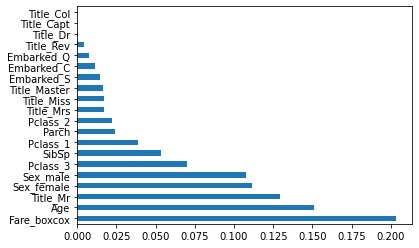

In [ ]:
# Fit the best Random Forest model found by GridSearchCV to the training data
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, y_train)

# Compute the feature importances for the best model and map them to the feature names
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)

# Select and plot the top 20 features with the highest importance
feat_importances.nlargest(20).plot(kind='barh') # horizontal bar plot of 20 largest values 
# Print 10 features with the highest importance
feat_importances.nlargest(10)

In [ ]:
feat_importances.nlargest(20)

Fare_boxcox     0.203298
Age             0.150746
Title_Mr        0.129351
Sex_female      0.111516
Sex_male        0.107504
Pclass_3        0.069773
SibSp           0.053445
Pclass_1        0.038518
Parch           0.024340
Pclass_2        0.022370
Title_Mrs       0.017372
Title_Miss      0.017313
Title_Master    0.016245
Embarked_S      0.014225
Embarked_C      0.011605
Embarked_Q      0.007739
Title_Rev       0.004149
Title_Dr        0.000493
Title_Capt      0.000000
Title_Col       0.000000
dtype: float64

### 5.2.5 Xtreme Gradient Boosting

In [ ]:
# Randomized Search
"""xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')"""

"xgb = XGBClassifier(random_state = 1)\n\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250, 500,1000],\n    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25, None],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2],\n    'subsample': [0.5,0.6,0.7, 0.8, 0.9],\n    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],\n    'gamma':[0,.01,.1,1,10,100],\n    'min_child_weight':[0,.01,0.1,1,10,100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n\n#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\n#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)\n#clf_performance(best_clf_xgb,'XGB')\nclf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)\nclf_performance(best_clf_xgb_rnd,'XGB')"

In [ ]:
# Grid Search
# Instantiate an XGBoost classifier with a random state of 1
xgb = XGBClassifier(random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [450, 500, 550],  # Number of boosted trees to fit
    'colsample_bytree': [0.75, 0.8, 0.85],  # Subsample ratio of columns when constructing each tree
    'max_depth': [None],  # Maximum tree depth for base learners
    'reg_alpha': [1],  # L1 regularization term on weights
    'reg_lambda': [2, 5, 10],  # L2 regularization term on weights
    'subsample': [0.55, 0.6, 0.65],  # Subsample ratio of the training instances
    'learning_rate': [0.5],  # Boosting learning rate
    'gamma': [0.5, 1, 2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'min_child_weight': [0.01],  # Minimum sum of instance weight needed in a child
    'sampling_method': ['uniform']  # The method to use to sample weights
}

# Instantiate GridSearchCV with the XGBoost classifier, parameter grid, 5-fold cross-validation, verbosity, and parallelization settings
clf_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the GridSearchCV to the training data to find the best XGBoost model
best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)

# Display the performance metrics for the best XGBoost model found
clf_performance(best_clf_xgb, 'XGB')  

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8485091959073504
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.55}


## **5.3 Ensemble Learning**
Ensemble learning is a machine learning technique that *combines* multiple base models to create a more accurate and robust final model.  
There are several approaches to ensemble learning, including bagging, boosting, and stacking.
1.	**Bagging** (Bootstrap Aggregating): Bagging aims to improve the stability and reduce the variance of a single model by training multiple base models **independently** on different subsets of the training data.  Random Forest is a popular bagging algorithm that uses decision trees as base models.
2.	**Boosting**: Boosting is an iterative technique that adjusts the weights of training instances to focus on the ones that are harder to predict. It trains base models **sequentially**, where each subsequent model aims to correct the errors made by the previous model. The final prediction is made by combining the weighted predictions of all the base models. Gradient Boosting Machine (GBM) and Adaptive Boosting (AdaBoost) are well-known boosting algorithms.
3.	**Stacking**: Stacking **combines** the predictions of multiple base models using a meta-model or meta-learner.  
Ensemble learning is particularly useful when dealing with complex problems, noisy data, or when a single model is prone to overfitting. By combining the outputs of multiple models, ensemble learning can produce a more stable and accurate model that generalizes well to new, unseen data.

In the following, we create four different ensemble models using the VotingClassifier. These models combine the predictions of the best estimators found through previous hyperparameter tuning for different base classifiers (KNN, Random Forest, SVC, Logistic Regression, and XGBoost).
1.	voting_clf_hard: A **hard voting** ensemble model using KNN, Random Forest, and SVC as base classifiers. It predicts the class with the majority of votes from the base classifiers.
2.	voting_clf_soft: A **soft voting** ensemble model using KNN, Random Forest, and SVC as base classifiers. It predicts the class with the highest average probability from the base classifiers.
3.	voting_clf_all: A **soft voting** ensemble model using KNN, Random Forest, SVC, and Logistic Regression as base classifiers. It predicts the class with the highest average probability from the base classifiers.
4.	voting_clf_xgb: A **soft voting** ensemble model using KNN, Random Forest, SVC, XGBoost, and Logistic Regression as base classifiers. It predicts the class with the highest average probability from the base classifiers.
By combining the predictions of multiple base classifiers, these ensemble models aim to achieve better performance and generalization compared to using a single classifier.

Model Additional Ensemble Approaches:

1) Experimented with a hard voting classifier of three estimators (KNN, SVM, RF) (81.6%)

2) **Experimented with a soft voting classifier of three estimators (KNN, SVM, RF) (82.3%) (Best Performance)**

3) Experimented with soft voting on all estimators performing better than 80% except xgb (KNN, RF, LR, SVC) (82.9%)

4) Experimented with soft voting on all estimators including XGB (KNN, SVM, RF, LR, XGB) (83.5%)

In [ ]:
# Store the best estimators from each individual model
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

# Create ensemble models using VotingClassifier with different combinations of models and voting strategies
voting_clf_hard = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'hard')  # Hard voting with KNN, RF, and SVC
voting_clf_soft = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'soft')  # Soft voting with KNN, RF, and SVC
voting_clf_all = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr)], voting = 'soft')  # Soft voting with KNN, RF, SVC, and LR
voting_clf_xgb = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('xgb', best_xgb), ('lr', best_lr)], voting = 'soft')  # Soft voting with KNN, RF, SVC, XGB, and LR

# Evaluate the performance of each ensemble model using cross-validation
print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.79329609 0.81460674 0.83146067 0.80337079 0.83146067]
voting_clf_hard mean : 0.8148389931579938
voting_clf_soft : [0.80446927 0.8258427  0.8258427  0.79775281 0.85955056]
voting_clf_soft mean : 0.8226916075575922
voting_clf_all : [0.82122905 0.8258427  0.8258427  0.79213483 0.85955056]
voting_clf_all mean : 0.8249199673592367
voting_clf_xgb : [0.82681564 0.83146067 0.84831461 0.79213483 0.85393258]
voting_clf_xgb mean : 0.8316552633230808


These results provide a comparison of the performance of each ensemble model. The highest mean cross-validation score is achieved by the **voting_clf_xgb model** **(0.8305)**, which combines KNN, RF, SVC, XGB, and LR with soft voting. The performance is evaluated using cross-validation with a 5-fold split of the training data. Each ensemble model uses a different combination of models and voting strategies.
1.	*voting_clf_hard* is an ensemble model using hard voting with KNN, RF, and SVC. The cross-validation scores for each of the 5 folds are displayed, followed by the mean cross-validation score (0.8148). Hard voting means that the final prediction is based on the majority vote of the classifiers.
2.	*voting_clf_soft* is an ensemble model using soft voting with KNN, RF, and SVC. The cross-validation scores for each of the 5 folds are displayed, followed by the mean cross-validation score (0.8227). Soft voting means that the final prediction is based on the weighted sum of the predicted probabilities of each classifier.
3.	*voting_clf_all* is an ensemble model using soft voting with KNN, RF, SVC, and LR. The cross-validation scores for each of the 5 folds are displayed, followed by the mean cross-validation score (0.8249). This model also uses soft voting, but it includes an additional Logistic Regression classifier.
4.	*voting_clf_xgb* is an ensemble model using soft voting with KNN, RF, SVC, XGB, and LR. The cross-validation scores for each of the 5 folds are displayed, followed by the mean cross-validation score (0.8305). This model also uses soft voting, but it includes an additional XGBoost classifier.


### 5.3.1 Fine-Tuning Soft Voting Classifier with Grid Search to Optimize Model Weights

This code is attempting to fine-tune a soft voting classifier by assigning different weights to the individual models. In a soft voting classifier, the final prediction is based on the weighted sum of the predicted probabilities of each classifier. By adjusting the weights, the classifier can emphasize the importance of certain models over others.
1.	A list of possible weight combinations is defined in the variable **params**. These weights will be applied to the individual models (KNN, RF, and SVC) within the soft voting classifier.
2.	**GridSearchCV** is used to explore the different weightings for the soft voting classifier (**voting_clf_soft**). The grid search iterates through all the possible weight combinations in params and evaluates the performance of the classifier using 5-fold cross-validation.
3.	The **fit** function is called on **vote_weight** to train the soft voting classifier with different weight combinations using the scaled training data (X_train_scaled and y_train).
4.	The **clf_performance** function is called to display the performance of the **best weight combination** found during the grid search (best_clf_weight).
5.	The best weight combination is then used to make predictions on the scaled test data (X_test_scaled). The predictions are stored in the variable **voting_clf_sub**.


In [ ]:
# Define the possible weight combinations for the individual models within the soft voting classifier
params = {'weights': [[1, 1, 1], [1, 2, 1], [1, 1, 2], [2, 1, 1], [2, 2, 1], [1, 2, 2], [2, 1, 2]]}

# Perform a grid search to find the optimal weights for the soft voting classifier
vote_weight = GridSearchCV(voting_clf_soft, param_grid=params, cv=5, verbose=True, n_jobs=-1)

# Fit the grid search to the training data
best_clf_weight = vote_weight.fit(X_train_scaled, y_train)

# Display the performance of the best weighted soft voting classifier
clf_performance(best_clf_weight, 'VC Weights') # VC Weights: a string used as a label or identifier for the specific classifier being evaluated ( Voting Classifier with optimized weights)

# Use the best weighted soft voting classifier to make predictions on the test set
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score: 0.8338899001945892
Best Parameters: {'weights': [2, 2, 1]}


This code output shows the results of the grid search optimization process for finding the best weights for the individual models within the soft voting classifier.
1.	The grid search performs a total of 35 fits, as there are 7 possible weight combinations (defined in params) and 5-fold cross-validation is used (5 fits for each weight combination).
2.	The "VC Weights" label is displayed to indicate that this output corresponds to the performance of the soft voting classifier with optimized weights.
3.	The best score achieved during the grid search is 0.8338899001945892. This score is a measure of the classifier's performance, likely accuracy, though it could be another metric like F1-score depending on the clf_performance function implementation.
4.	The best parameters found during the grid search are {'weights': [2, 2, 1]}. This indicates that the optimal weight combination for the individual models in the soft voting classifier is 2 for the first model (KNN), 2 for the second model (RF), and 1 for the third model (SVC).
5.	Finally, the best weighted soft voting classifier (with weights [2, 2, 1]) is used to make predictions on the test set (X_test_scaled). These predictions are stored in the voting_clf_sub variable.

In summary, the output demonstrates that the soft voting classifier with optimized weights ([2, 2, 1]) (2 for (KNN), 2 for (RF), and 1 (SVC)) yields a better performance score (0.8338899001945892) compared to the initial classifier without weight optimization. This optimized classifier is then used to make predictions on the test data.


## 5.4 Predictions

We now train different ensemble classifiers and a single RandomForest classifier on the scaled training data and makes predictions on the scaled test data.

In [ ]:
# Train ensemble classifiers and the best RandomForest classifier on the scaled training data
voting_clf_hard.fit(X_train_scaled, y_train)  # Train hard voting classifier
voting_clf_soft.fit(X_train_scaled, y_train)  # Train soft voting classifier
voting_clf_all.fit(X_train_scaled, y_train)   # Train soft voting classifier with Logistic Regression
voting_clf_xgb.fit(X_train_scaled, y_train)   # Train soft voting classifier with XGBoost
best_rf.fit(X_train_scaled, y_train)          # Train best RandomForest classifier

# Make predictions using trained classifiers on the scaled test data
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)  # Predictions from hard voting classifier
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)               # Predictions from RandomForest classifier
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int) # Predictions from soft voting classifier
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)    # Predictions from soft voting classifier with Logistic Regression
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)    # Predictions from soft voting classifier with XGBoost


In [ ]:
# Convert predictions to dataframes for submission and comparison
final_data = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)  # DataFrame for RandomForest predictions

final_data_2 = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)  # DataFrame for hard voting classifier predictions

final_data_3 = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)  # DataFrame for soft voting classifier predictions

final_data_4 = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)  # DataFrame for soft voting classifier with Logistic Regression predictions

final_data_5 = {'PassengerId': df_test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)  # DataFrame for soft voting classifier with XGBoost predictions

# DataFrame for comparing predictions from different classifiers
final_data_comp = {'PassengerId': df_test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard,
                   'Survived_rf': y_hat_rf, 'Survived_vc_soft': y_hat_vc_soft, 'Survived_vc_all': y_hat_vc_all,  'Survived_vc_xgb': y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)


In [ ]:
# Calculate differences between classifier outputs for comparison

# Differences between RandomForest and hard voting classifier predictions
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis=1)  

# Differences between hard and soft voting classifier predictions
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis=1) 
  
 # Differences between hard voting classifier and soft voting classifier with Logistic Regression predictions
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis=1)   


In [ ]:
# Count the number of instances where predictions differ between hard voting classifier and soft voting classifier with Logistic Regression
comparison.difference_hard_all.value_counts()

0    407
1     11
Name: difference_hard_all, dtype: int64

In [ ]:
# Prepare submission files for each classifier
submission.to_csv('submission_rf.csv', index=False)         # Save Random Forest predictions to a CSV file
submission_2.to_csv('submission_vc_hard.csv', index=False)  # Save Hard Voting Classifier predictions to a CSV file
submission_3.to_csv('submission_vc_soft.csv', index=False)  # Save Soft Voting Classifier predictions to a CSV file
submission_4.to_csv('submission_vc_all.csv', index=False)   # Save Soft Voting Classifier with Logistic Regression predictions to a CSV file
submission_5.to_csv('submission_vc_xgb2.csv', index=False)  # Save Soft Voting Classifier with XGBoost and Logistic Regression predictions to a CSV file


# **6. Deep Learning**
1. **TensorFlow** ***{Multi-Layer Perceptron (MLP) classifier}***
2. **SKLEARN** ***{Multi-Layer Perceptron (MLP) classifier}***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import logging
from tensorflow.keras.callbacks import EarlyStopping

## 6.1 Split Scaled Dataset (train, test)

In [ ]:
from sklearn.model_selection import train_test_split

# explinatory variable (i.e., everything except the target varaible)
X = X_train_scaled
# target variable
y = y_train

# split the data into training and testing sets using train_test_split function
# test_size=0.33 indicates that we want to reserve 33% of the data for testing
# random_state=42 is a seed value to ensure reproducibility of the random split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.2 Model Building (TensorFlow)

In [ ]:
# Create a sequential model object
model = Sequential()

# Add a dense layer with 78 output neurons with a ReLU activation function
model.add(Dense(78, activation='relu'))
# Add a dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))
# Add another dense layer with 19 output neurons, with a ReLU activation function
model.add(Dense(39, activation='relu'))
# Add another dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))
# Add another dense layer with 19 output neurons, with a ReLU activation function
model.add(Dense(19, activation='relu'))
# Add another dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))
# Add another dense layer with 19 output neurons, with a ReLU activation function
model.add(Dense(19, activation='relu'))
# Add another dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))

# Add the output layer with 1 neuron and a sigmoid activation function, since it's a binary classification problem
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss function, Adam optimizer and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

**monitor='val_loss'** is a parameter of EarlyStopping function in Keras that specifies the quantity to be monitored for early stopping. In this case, val_loss is used, which stands for the validation loss. It means the EarlyStopping function monitors the validation loss during training, and it stops the training process when the validation loss does not improve for a certain number of epochs specified by the patience parameter.

**verbose=1** means that during training, Keras will print a message for each epoch to show the progress of the training. Specifically, it will print the epoch number, the training loss, and any validation metrics being tracked (if applicable).

**patience=5** sets the number of epochs to wait before stopping the training if there is no improvement in the validation loss. In other words, if the validation loss does not improve after 5 epochs, the training will be stopped early. This is done to prevent overfitting of the model on the training data. If the patience value is too small, the training may stop too early and the model may not reach its optimal performance. If it is too large, the model may overfit to the training data. The value of patience can be adjusted based on the specific dataset and model being used.

In [ ]:
# running the model
model.fit(x=X_train_dl, y=y_train_dl, epochs=50, batch_size=256, validation_data=(X_test_dl, y_test_dl), callbacks=[early_stop])

Epoch 1/50
3/3 [==============================] - 3s 396ms/step - loss: 0.6818 - accuracy: 0.5716 - val_loss: 0.6702 - val_accuracy: 0.7542
Epoch 2/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6676 - accuracy: 0.6475 - val_loss: 0.6577 - val_accuracy: 0.7598
Epoch 3/50
3/3 [==============================] - 0s 37ms/step - loss: 0.6622 - accuracy: 0.6404 - val_loss: 0.6460 - val_accuracy: 0.7374
Epoch 4/50
3/3 [==============================] - 0s 44ms/step - loss: 0.6457 - accuracy: 0.6840 - val_loss: 0.6323 - val_accuracy: 0.7430
Epoch 5/50
3/3 [==============================] - 0s 38ms/step - loss: 0.6386 - accuracy: 0.7022 - val_loss: 0.6166 - val_accuracy: 0.7430
Epoch 6/50
3/3 [==============================] - 0s 38ms/step - loss: 0.6250 - accuracy: 0.6896 - val_loss: 0.6000 - val_accuracy: 0.7654
Epoch 7/50
3/3 [==============================] - 0s 29ms/step - loss: 0.6156 - accuracy: 0.6854 - val_loss: 0.5826 - val_accuracy: 0.7933
Epoch 8/50
3/3 [==========

This code trains the model on the training data (X_train_dl and y_train_dl) with 50 epochs and a batch size of 256. The model's performance on unseen data is monitored using the **validation data (X_test and y_test)**. The **early_stop** callback is used to prevent overfitting by stopping the training process when the **validation loss** does not improve after 5 epochs.

## 6.3 Model Performance Demonstration (TensorFlow)

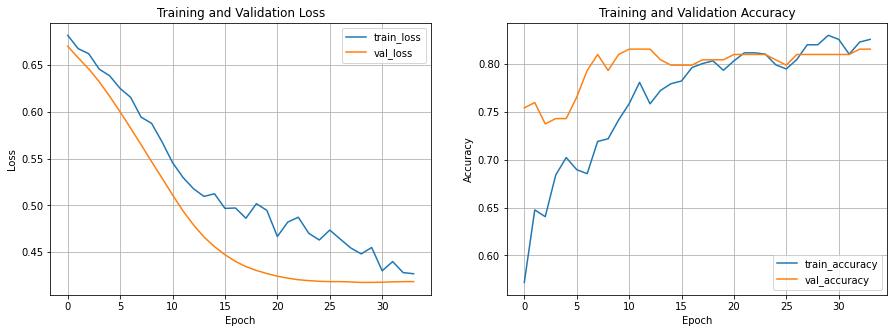

In [ ]:
# plotting the loss and accuracy
history = model.history.history
loss = pd.DataFrame(history['loss'])
val_loss = pd.DataFrame(history['val_loss'])
acc = pd.DataFrame(history['accuracy'])
val_acc = pd.DataFrame(history['val_accuracy'])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# plot loss
ax1.plot(loss, label='train_loss')
ax1.plot(val_loss, label='val_loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# plot accuracy
ax2.plot(acc, label='train_accuracy')
ax2.plot(val_acc, label='val_accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)


plt.show()


**"train_loss"** refers to the *error between the predicted output* of the model and the ***true output***. This error is calculated during each iteration of the training process, and the goal of training is to minimize this error.

**"Val_loss"** or "validation loss" refers to the *error or loss* calculated on a separate validation dataset, which is distinct from the training data. This validation dataset is used to evaluate the model's performance on ***unseen/test data***, and to prevent overfitting during training. By monitoring both the training loss and validation loss, we can check whether the model is overfitting, and adjust the model's architecture or parameters accordingly to improve its performance.

### **6.4** **Classification Report (TensorFlow)**
A classification report is a comprehensive summary of performance metrics for a classification model. It is a tabular representation that provides insight into the effectiveness of the model by displaying various evaluation metrics for each class label. The classification report is generated by comparing the true class labels with the predicted class labels obtained from the model.

In [ ]:
from sklearn.metrics import classification_report

# Make predictions using the trained model
y_pred_probs = model.predict(X_test_dl)

# Convert the predicted probabilities into class labels (threshold at 0.5 for binary classification)
y_pred = (y_pred_probs > 0.5).astype('int32')

# Print the classification report
print(classification_report(y_test_dl, y_pred))

6/6 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



The metrics are calculated separately for each class (0 and 1) and are also summarized as an overall accuracy. Here's an interpretation of the results:
1.	Class 0 (Negative class):
•	**Precision**: 0.83 indicates that, out of all the instances predicted as class 0, 81% were actually class 0.
•	**Recall**: 0.87 indicates that, out of all the true class 0 instances, the model correctly identified 88% of them.
•	**F1-score**: 0.85 is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. A higher F1-score (closer to 1) indicates better performance.
2.	Class 1 (Positive class):
•	Precision: 0.80 indicates that, out of all the instances predicted as class 1, 80% were actually class 1.
•	Recall: 0.74 indicates that, out of all the true class 1 instances, the model correctly identified only 72% of them.
•	F1-score: 0.77 is the harmonic mean of precision and recall for class 1. In this case, the F1-score is lower than class 0, indicating that the model's performance on the positive class is not as good as on the negative class.
3.	***Accuracy: 0.82*** is the overall accuracy of the model, indicating that the model correctly classified 81% of the instances in the test dataset.
The results show that the model performs very well on class 0 but not as well with class 1, especially in terms of recall. This might be due to class imbalance or other factors affecting the model's ability to generalize well on the positive class. To improve the model's performance on the positive class, you can consider using resampling techniques, adjusting the model architecture, or applying other strategies.

## 6.5 Model Building (SKLEARN)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create an instance of MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Fit the classifier to the training data
mlp_clf.fit(X_train_dl, y_train_dl)

# Make predictions on the test set
y_pred_dl = mlp_clf.predict(X_test_dl)

# Evaluate the classifier's performance
print("Accuracy:", accuracy_score(y_test_dl, y_pred_dl))
print(classification_report(y_test_dl, y_pred_dl))

Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       105
         1.0       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6.7 Model Tuning (SKLEARN)

This code will will use **Grid Search** search through various hyperparameters for the MLP classifier, including different hidden layer configurations, activation functions, optimization algorithms, learning rate schedules, and initial learning rates. You can adjust the values in the parameter grid to explore other hyperparameter combinations.

Please note that hyperparameter tuning for neural networks can be computationally expensive and time-consuming. You might want to consider using a more advanced method like **Random Search** or Bayesian optimization for more efficient tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Performance reporting function
def clf_performance_dl(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

# Instantiate an MLPClassifier model
mlp = MLPClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_dl = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50), (100,100,50)],  # Different hidden layer configurations
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedules
    'learning_rate_init': [0.001, 0.01],  # Initial learning rates
    'max_iter': [500, 1000],  # Maximum number of iterations for the solver
}

# Create the GridSearchCV object for the MLP model
clf_mlp = GridSearchCV(mlp, param_grid=param_grid_dl, cv=5, verbose=True, n_jobs=-1)

# Fit the GridSearchCV object to the training data
best_clf_mlp = clf_mlp.fit(X_train_dl, y_train_dl)

# Evaluate the MLP model's performance and display the best parameters
clf_performance_dl(best_clf_mlp, 'MLP Classifier')


Fitting 5 folds for each of 128 candidates, totalling 640 fits
MLP Classifier
Best Score: 0.8314192849404117
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'sgd'}
